<a href="https://colab.research.google.com/github/Al-x-R/Colab-examples/blob/master/PlayBoy_KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/an-2-an/data/master/girls.csv')
df.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


In [0]:
df.loc[(df['Year'] >= 1980) & (df['Year'] < 1980)]
df

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48
...,...,...,...,...,...,...,...
599,September,2008,86,64,91,170,52
600,October,2008,86,61,86,165,52
601,November,2008,86,53,81,168,49
602,December,2008,86,64,89,173,52


In [0]:
df['old'] = (df.Year > 1980).astype(int)

In [0]:
df

,Month,Year,Bust,Waist,Hips,Height,Weight,old
0,December,1953,91,61,91,165,54,0
1,March,1954,86,61,89,168,54,0
2,July,1955,91,61,91,166,52,0
3,December,1955,91,61,91,166,52,0
4,July,1956,91,61,86,157,48,0
...,...,...,...,...,...,...,...,...
599,September,2008,86,64,91,170,52,1
600,October,2008,86,61,86,165,52,1
601,November,2008,86,53,81,168,49,1
602,December,2008,86,64,89,173,52,1


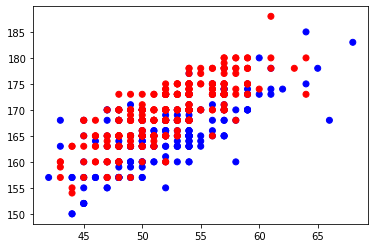

In [0]:
plt.scatter(x=df.Weight, y=df.Height, c=df.old.map({1:'red', 0:'blue'}));

In [0]:
for k in range(1,11): #кол-во соседей
  knn = KNeighborsClassifier(n_neighbors=k) #для каждого обучаем свою модель
  x = df[['Height','Weight']]
  y = df['old']
  knn.fit(x, y)

In [0]:
X = df[['Height','Weight']]
y = df['old']
print(X.shape, y.shape)

(604, 2) (604,)


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=765)

In [0]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(483, 2) (121, 2) (483,) (121,)


In [0]:
from sklearn import metrics
scores = {}
scores_list = []
for k in range(1,11): #кол-во соседей
  knn = KNeighborsClassifier(n_neighbors=k) #для каждого обучаем свою модель
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test) #сравниваем полученные с фактическими
  accuracy = metrics.accuracy_score(y_test, y_pred)
  scores[k] = accuracy
print(scores)

{1: 0.5702479338842975, 2: 0.5371900826446281, 3: 0.6363636363636364, 4: 0.5619834710743802, 5: 0.5619834710743802, 6: 0.5619834710743802, 7: 0.6115702479338843, 8: 0.6115702479338843, 9: 0.628099173553719, 10: 0.5619834710743802}


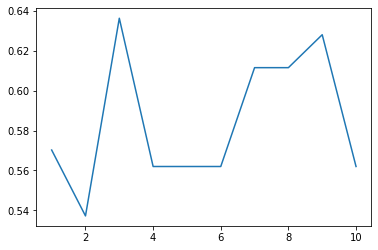

In [0]:
plt.plot(range(1,11), list(scores.values()));

In [0]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
X_try = [
         [165, 50],
         [172, 60],
         [180, 60],
         [190, 55],
         [150, 90],
         [165, 52]
]
y_predict = knn_final.predict(X_try)
for x_, y_ in zip(X_try, y_predict):
  type_ = dict(enumerate('old')).get(y_)
  print(f'{x_} -->  {type_}')

[165, 50] -->  o
[172, 60] -->  o
[180, 60] -->  l
[190, 55] -->  l
[150, 90] -->  o
[165, 52] -->  o
